# 

# Turnover test toegepast op directie

Periode  | Directeurs
------------- | -------------
1893 - 1898  | Edward Keurvels & Henry Fontaine
1898 - 1902  | Karel van Walle
1902 - 1909  | Jef Judels en Bernard Tokkie
1909 - 1922  | Henry Fontaine (gesloten tijdens WOI)
1922 - 1923  | Flor Alpaerts & Arthur Steurbout
1923 - 1932  | Fé Derickx & Bernard Tokkie
1923 - 1934  | Flor Bosmans


## Veranderingen in populaire producties (top 10)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("C:/Users/monaa/Dropbox/Thesis/Primair/KVO_META.csv", encoding='utf8', index_col=False)
df = df.set_index('Directors')

In [9]:
def df2ranking(df, rank_col='Directors', cutoff=10):
    """Transform a data frame into a popularity index."""
    df = df.sort_values(by=rank_col, ascending=False)
    df = df.reset_index()
    return df['Normalised title'][:cutoff] #Genormaliseerde titel

In [10]:
def get_ranks(df, cutoff):
    ranks = []
    for col in df.index.unique():
        index_df = df.loc[col]
        ranking = df2ranking(index_df, cutoff=cutoff)
        ranking.name = col
        ranks.append(ranking)
    
    return pd.DataFrame(ranks)

In [11]:
def turnover(df):
    """Compute the 'turnover' for popularity rankings."""
    df = df.apply(set, axis=1)
    return (df.iloc[1:] - df.shift(1).iloc[1:]).apply(len)

In [14]:
directie_10 = get_ranks(df, 10)
directie_5 =  get_ranks(df, 5)
directie_7 = get_ranks(df, 7)


directie_10 = turnover(directie_10)
directie_5 = turnover(directie_5)
directie_7 = turnover(directie_7)

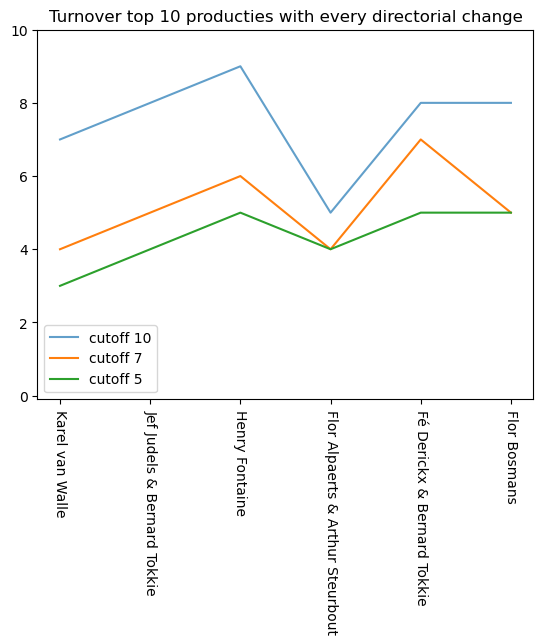

In [19]:
directie_10.plot(style='-', ylim=(-0.1, 10.0), alpha=0.7, title='Turnover top 10 producties with every directorial change');
directie_7.plot();
directie_5.plot();


plt.legend(['cutoff 10','cutoff 7','cutoff 5']);
plt.xticks(rotation=270);


#grote variate. Bijna de gehele top 10 wijzigt per directorial change
#nog andere k's proberen

# Verandering in genres (top 10)

In [24]:
def df2ranking(df, rank_col='Directors', cutoff=10):
    """Transform a data frame into a popularity index."""
    df = df.sort_values(by=rank_col, ascending=False)
    df = df.reset_index()
    return df['Genre'][:cutoff]

In [25]:
directie_10 = get_ranks(df, 10)
directie_5 =  get_ranks(df, 5)
directie_7 = get_ranks(df, 7)
directie_15 = get_ranks(df, 15)


directie_10 = turnover(directie_10)
directie_5 = turnover(directie_5)
directie_7 = turnover(directie_7)
directie_15 = turnover(directie_15)

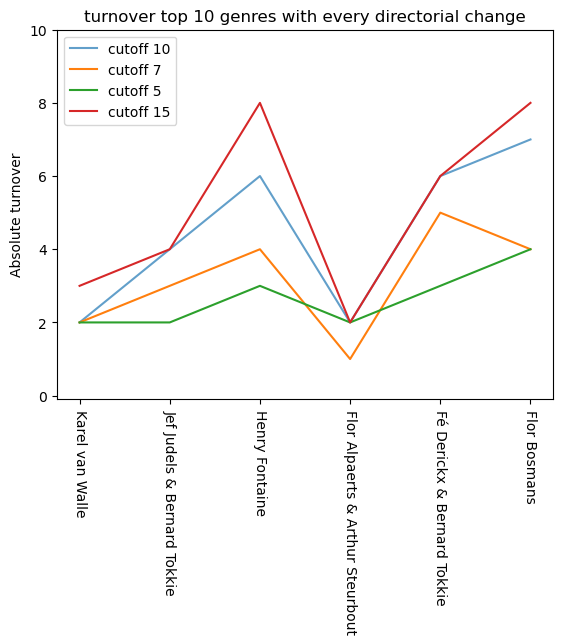

In [26]:
ax = directie_10.plot(
    style='-', ylim=(-0.1, 10.0), alpha=0.7,
    title='turnover top 10 genres with every directorial change')

directie_7.plot()
directie_5.plot()
directie_15.plot()

plt.legend(['cutoff 10','cutoff 7','cutoff 5', 'cutoff 15'])
plt.xticks(rotation=270)
ax.set_ylabel("Absolute turnover");

## Verandering in oorspronkelijke taal (top 5)

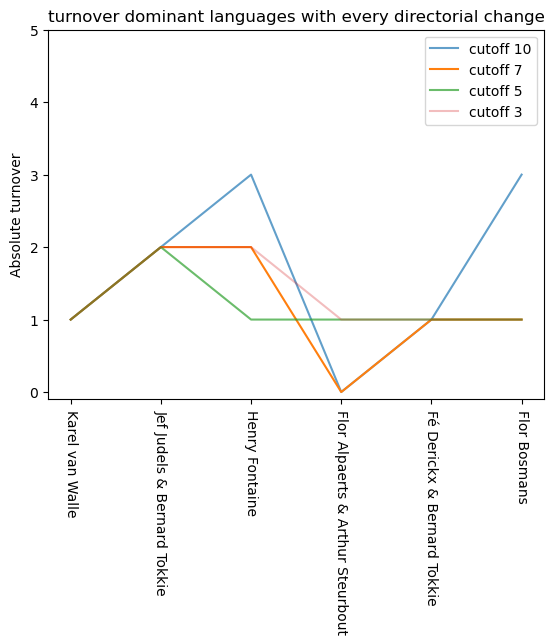

In [29]:
def df2ranking(df, rank_col='Directors', cutoff=5):
    """Transform a data frame into a popularity index."""
    df = df.sort_values(by=rank_col, ascending=False)
    df = df.reset_index()
    return df['Original language'][:cutoff]

directie_10 = get_ranks(df, 10)
directie_5 =  get_ranks(df, 5)
directie_7 = get_ranks(df, 7)
directie_3 = get_ranks(df, 3)


directie_10 = turnover(directie_10)
directie_5 = turnover(directie_5)
directie_7 = turnover(directie_7)
directie_3 = turnover(directie_3)

ax = directie_10.plot(
    style='-', ylim=(-0.1, 5), alpha=0.7,
    title='turnover dominant languages with every directorial change'
)

directie_7.plot()
directie_5.plot(alpha = 0.7)
directie_3.plot(alpha = 0.3)

plt.legend(['cutoff 10','cutoff 7','cutoff 5', 'cutoff 3'])

plt.xticks(rotation=270)
ax.set_ylabel("Absolute turnover");



# Turnover toegepast op seizoen

## Top 10 producties

In [30]:
df = df.set_index('Collection')

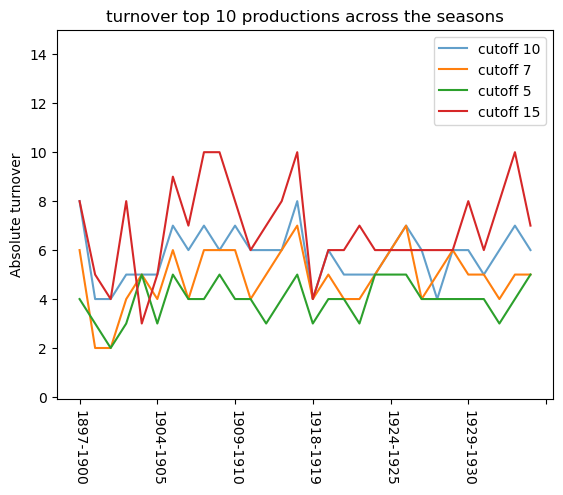

In [32]:
def df2ranking(df, rank_col='Collection', cutoff=10):
    """Transform a data frame into a popularity index."""
    df = df.sort_values(by=rank_col, ascending=False)
    df = df.reset_index()
    return df['Original title'][:cutoff]

directie_10 = get_ranks(df, 10)
directie_5 =  get_ranks(df, 5)
directie_7 = get_ranks(df, 7)
directie_15 = get_ranks(df, 15)


directie_10 = turnover(directie_10)
directie_5 = turnover(directie_5)
directie_7 = turnover(directie_7)
directie_15 = turnover(directie_15)


ax = directie_10.plot(
    style='-', ylim=(-0.1, 15), alpha=0.7,
    title='turnover top 10 productions across the seasons'
)

directie_7.plot()
directie_5.plot()
directie_15.plot()

plt.legend(['cutoff 10','cutoff 7','cutoff 5', 'cutoff 15'])
plt.xticks(rotation=270)
ax.set_ylabel("Absolute turnover");

## Verandering in populaire genres (top 10) overheen de seizoenen.

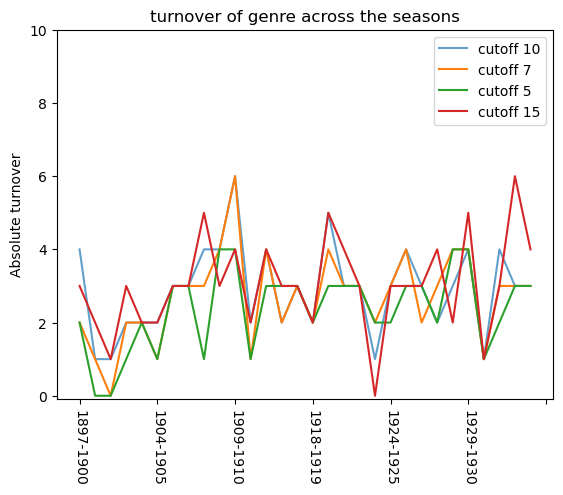

In [34]:
def df2ranking(df, rank_col='Collection', cutoff=10):
    """Transform a data frame into a popularity index."""
    df = df.sort_values(by=rank_col, ascending=False)
    df = df.reset_index()
    return df['Genre'][:cutoff]

directie_10 = get_ranks(df, 10)
directie_5 =  get_ranks(df, 5)
directie_7 = get_ranks(df, 7)
directie_15 = get_ranks(df, 15)


directie_10 = turnover(directie_10)
directie_5 = turnover(directie_5)
directie_7 = turnover(directie_7)
directie_15 = turnover(directie_15)

ax = directie_10.plot(
    style='-', ylim=(-0.1, 10), alpha=0.7,
    title='turnover of genre across the seasons')

directie_7.plot()
directie_5.plot()
directie_15.plot()

plt.legend(['cutoff 10','cutoff 7','cutoff 5', 'cutoff 15'])

plt.xticks(rotation=270)
ax.set_ylabel("Absolute turnover");

## Verandering in oorspronkelijke taal (top 5) overheen de seizoenen.

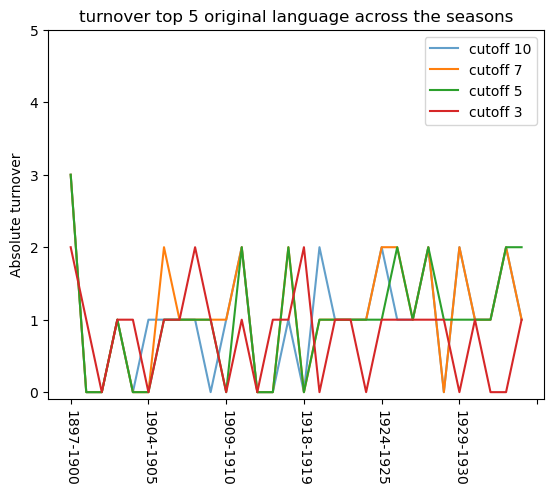

In [35]:
def df2ranking(df, rank_col='Collection', cutoff=5):
    """Transform a data frame into a popularity index."""
    df = df.sort_values(by=rank_col, ascending=False)
    df = df.reset_index()
    return df['Original language'][:cutoff]

directie_10 = get_ranks(df, 10)
directie_5 =  get_ranks(df, 5)
directie_7 = get_ranks(df, 7)
directie_3 = get_ranks(df, 3)


directie_10 = turnover(directie_10)
directie_5 = turnover(directie_5)
directie_7 = turnover(directie_7)
directie_3 = turnover(directie_3)

ax = directie_10.plot(
    style='-', ylim=(-0.1, 5), alpha=0.7,
    title='turnover top 5 original language across the seasons')

directie_7.plot()
directie_5.plot()
directie_3.plot()

plt.legend(['cutoff 10','cutoff 7','cutoff 5', 'cutoff 3'])

plt.xticks(rotation=270)
ax.set_ylabel("Absolute turnover");